### Week-1 assignment: Machine Learning & Data Mining 

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [184]:
# Load dataset
df = pd.read_csv('./floor/IBM.txt', delimiter = " ")
print("Number of rows in original data: {}\n"
      .format(len(df.index)))
print(df.head(10))

Number of rows in original data: 3692

         Date        Open        High        Low       Close    Volume  \
0  2007-01-03   97.180000   98.400002  96.260002   97.269997   9196800   
1  2007-01-04   97.250000   98.790001  96.879997   98.309998  10524500   
2  2007-01-05   97.599998   97.949997  96.910004   97.419998   7221300   
3  2007-01-08   98.500000   99.500000  98.349998   98.900002  10340000   
4  2007-01-09   99.080002  100.330002  99.070000  100.070000  11108200   
5  2007-01-10   98.500000   99.050003  97.930000   98.889999   8744800   
6  2007-01-11   99.000000   99.900002  98.500000   98.650002   8000700   
7  2007-01-12   98.989998   99.690002  98.500000   99.339996   6636500   
8  2007-01-16   99.400002  100.839996  99.300003  100.820000   9602200   
9  2007-01-17  100.690002  100.900002  99.900002  100.019997   8200700   

    Adjusted  
0  63.127567  
1  63.802544  
2  63.224930  
3  64.185463  
4  64.944771  
5  64.178978  
6  64.023201  
7  64.471024  
8  65.43150

### Q1:  Quality of data

In [185]:
# count the null or None values in each column and display by frequency
total_null = df.isnull().sum().sort_values(ascending=False)
print("Number of Null or None values in data: \n{}\n"
      .format(total_null))

# delete the rows containing missing values
df_processed = df.dropna(axis=0)

print("Number of datapoints in original data              : {}"
      .format(len(df.index)))
print("Number of datapoints after removing missing values : {}"
      .format(len(df_processed.index)))




Number of Null or None values in data: 
Adjusted    0
Volume      0
Close       0
Low         0
High        0
Open        0
Date        0
dtype: int64

Number of datapoints in original data              : 3692
Number of datapoints after removing missing values : 3692


### 2. Summarize the values

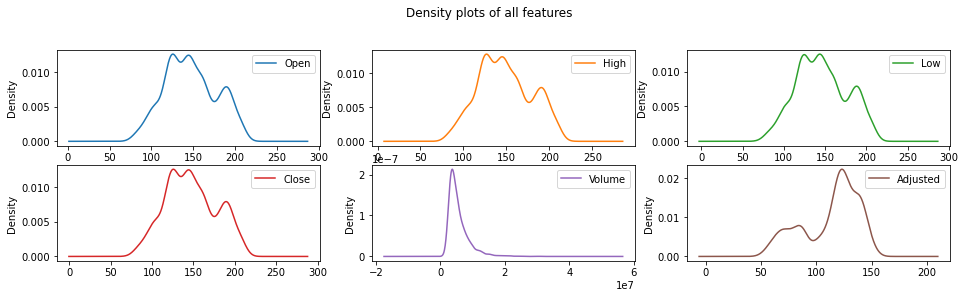

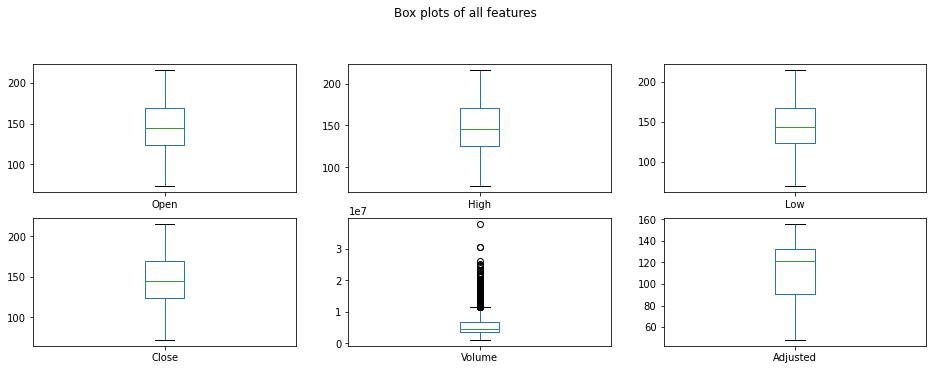

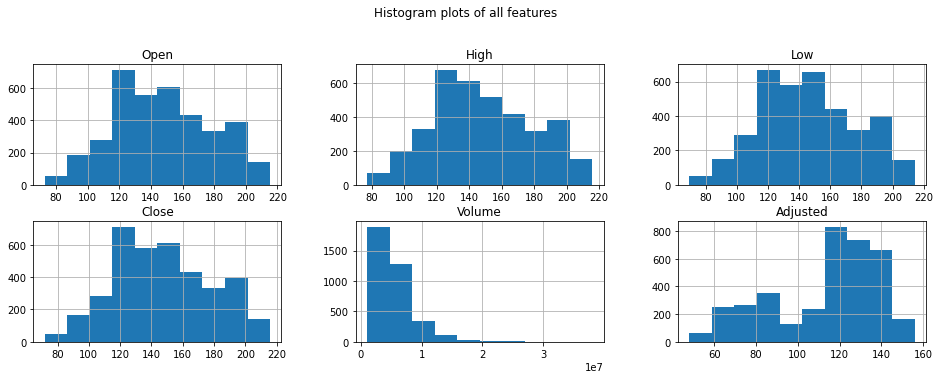

Text(0.5, 0.98, 'Paair wise plot of all features')

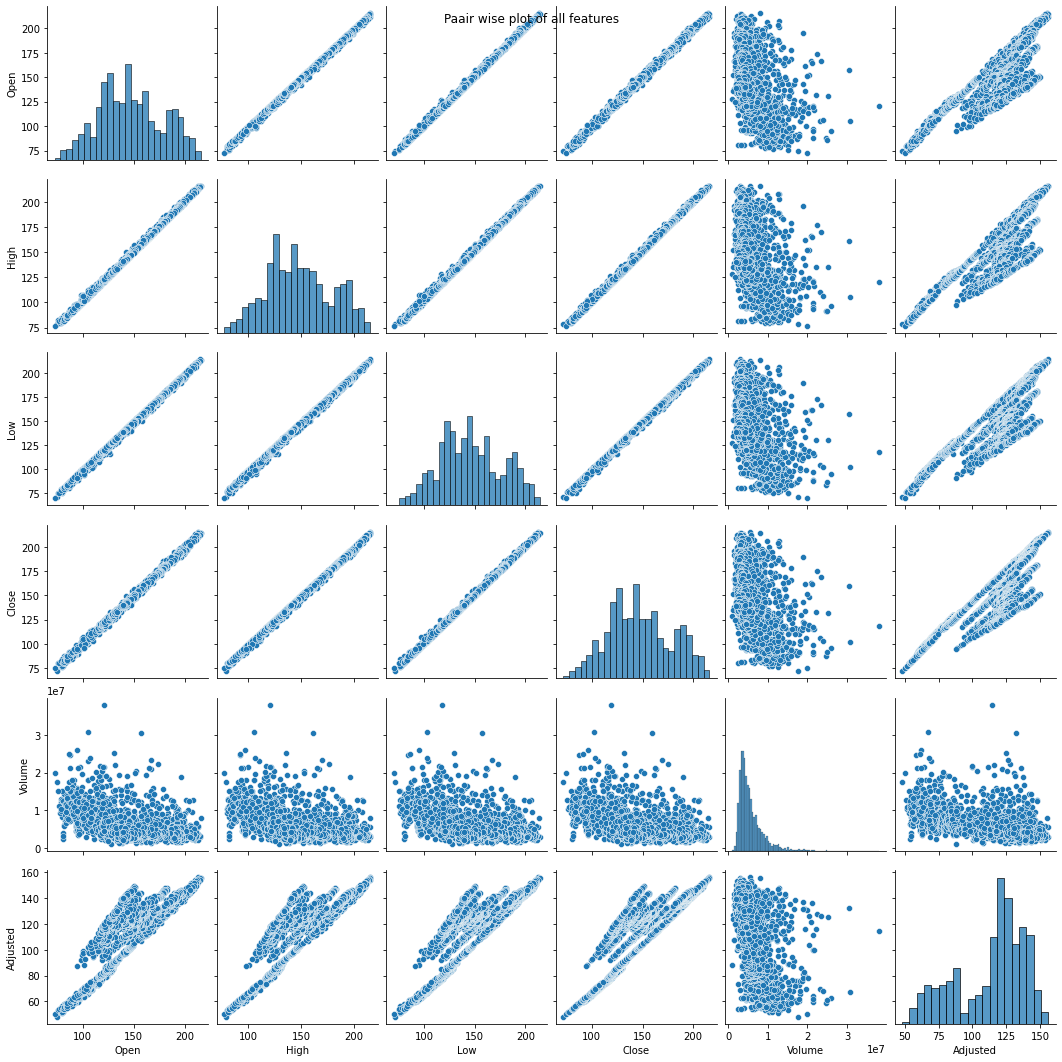

In [216]:
# Summarization of processed data
df_processed.describe()  

df_processed.plot(kind='density', subplots=True, layout=(3,3), 
                  title='Density plots of all features',
                  sharex=False,  figsize=(16,6))
plt.show()


df_processed.plot(kind='box', subplots=True, layout=(3,3), 
                  title='Box plots of all features',
                  sharex=False, sharey=False,  figsize=(16,8))
plt.show()

df_processed.hist(figsize=(16,8), layout=(3,3))
plt.suptitle("Histogram plots of all features")
plt.show()


g = sns.pairplot(df_processed)
g.fig.suptitle("Paair wise plot of all features") 


### 3. Summarize the Volume

Sorted dataframe by volume: 

            Date        Open        High         Low       Close    Volume  \
3538  2021-01-22  120.699997  120.699997  117.360001  118.610001  38063500   
106   2007-06-06  105.500000  105.510002  102.389999  102.410004  30770700   
2718  2017-10-18  157.119995  161.229996  156.949997  159.529999  30490200   
11    2007-01-19   95.000000   96.849998   94.550003   96.169998  26035800   
3466  2020-10-08  130.860001  135.500000  129.770004  131.490005  25288900   

        Adjusted  Daily_returns  
3538  114.435143      -9.905046  
106    66.923210      -3.240733  
2718  132.191544       8.864478  
11     62.413712      -3.298139  
3466  125.048523       5.980499  


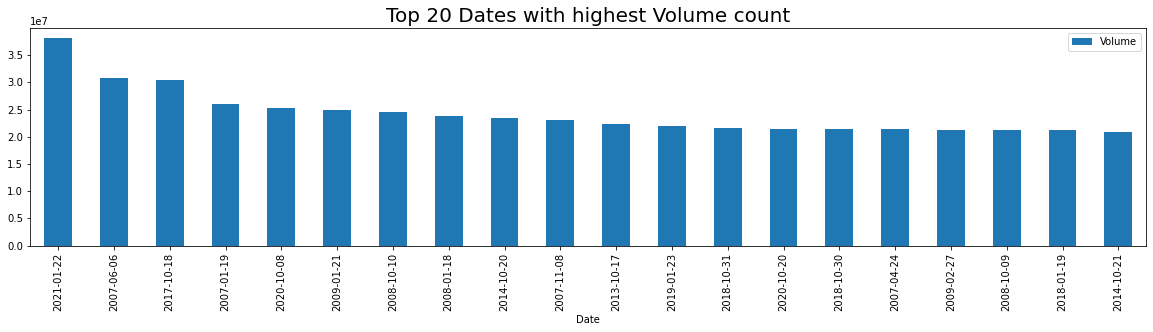

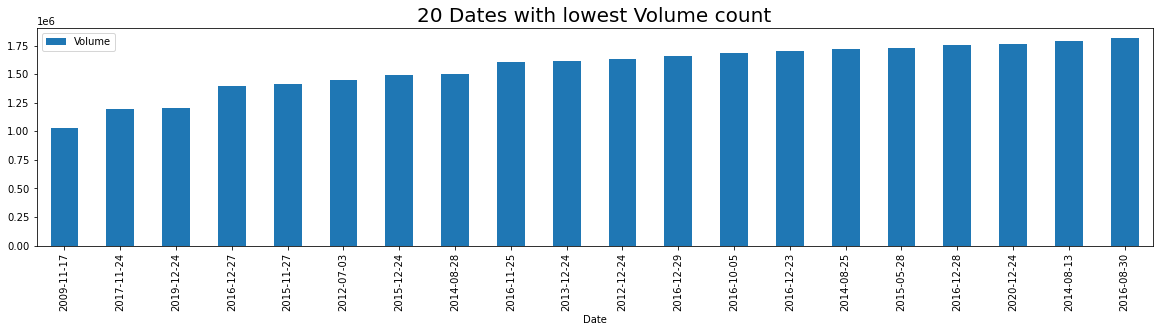

/Users/krishna/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Volume', ylabel='Density'>

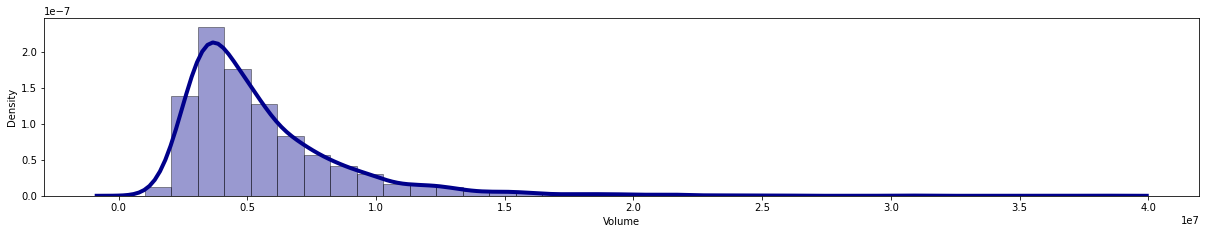

In [131]:
sorted_dates_by_volume = df_processed.sort_values(['Volume'], 
                                                  ascending = False)
print("Sorted dataframe by volume: \n\n{}"
      .format(sorted_dates_by_volume.head(5)))

ax = sorted_dates_by_volume.head(20).plot(y='Volume', 
    x='Date', kind = 'bar',
    title='Top 20 Dates with highest Volume count', 
    figsize=(20,4))
ax.axes.title.set_size(20)

ax= sorted_dates_by_volume.tail(20)[::-1].plot(y='Volume', 
       x='Date', kind = 'bar', 
    title='20 Dates with lowest Volume count', figsize=(20,4))
ax.axes.title.set_size(20)
plt.show()


fig, ax = plt.subplots()
fig.set_size_inches(20.7, 3.27)
sns.distplot(df_processed['Volume'], hist = True, kde=True, bins=int(180/5),
             color='darkblue', hist_kws={'edgecolor':'black'},kde_kws={'linewidth':4})

### 4. Degree of Variation or Volatility

 ###  Volatility of data  is often measured as the  either the standard deviation of the stock price over a given time range.
 
 ### This metric reflects the average amount a stock's price has differed from the mean over a period of time

In [218]:
### we calculate the volatility of stock for each year 

def volatility(dff):
    std = dff['Close'].std()
    mean = dff['Close'].mean()
    return mean, std


for year in range(2007, 2022):
    df_year = df_processed[pd.DatetimeIndex(df_processed['Date']).year == year]
    mean, std = volatility(df_year)
    print("Year: {}, No. of rows: {}, Mean price: {:.1f},"
        " Volatility(STDDev.): {:.1f}".format(year, len(df_year), mean, std))
    
    


Year: 2007, No. of rows: 251, Mean price: 105.8, Volatility(STDDev.): 7.7
Year: 2008, No. of rows: 253, Mean price: 110.0, Volatility(STDDev.): 16.4
Year: 2009, No. of rows: 252, Mean price: 109.3, Volatility(STDDev.): 13.9
Year: 2010, No. of rows: 252, Mean price: 131.9, Volatility(STDDev.): 7.2
Year: 2011, No. of rows: 252, Mean price: 170.9, Volatility(STDDev.): 10.7
Year: 2012, No. of rows: 250, Mean price: 196.6, Volatility(STDDev.): 7.1
Year: 2013, No. of rows: 252, Mean price: 194.1, Volatility(STDDev.): 11.2
Year: 2014, No. of rows: 252, Mean price: 182.3, Volatility(STDDev.): 11.5
Year: 2015, No. of rows: 252, Mean price: 155.4, Volatility(STDDev.): 11.6
Year: 2016, No. of rows: 252, Mean price: 150.5, Volatility(STDDev.): 11.8
Year: 2017, No. of rows: 251, Mean price: 157.7, Volatility(STDDev.): 12.1
Year: 2018, No. of rows: 251, Mean price: 143.9, Volatility(STDDev.): 13.7
Year: 2019, No. of rows: 252, Mean price: 137.0, Volatility(STDDev.): 6.2
Year: 2020, No. of rows: 253,

### 5. Compute a new data series corresponding to the daily return 

In [129]:
# Daily returns column in percentage

df_processed['Daily_returns'] = 100*((df_processed['Close'] - df_processed['Close'].shift())
                               / df_processed['Close'].shift())
print(df_processed.head(10))

         Date        Open        High        Low       Close    Volume  \
0  2007-01-03   97.180000   98.400002  96.260002   97.269997   9196800   
1  2007-01-04   97.250000   98.790001  96.879997   98.309998  10524500   
2  2007-01-05   97.599998   97.949997  96.910004   97.419998   7221300   
3  2007-01-08   98.500000   99.500000  98.349998   98.900002  10340000   
4  2007-01-09   99.080002  100.330002  99.070000  100.070000  11108200   
5  2007-01-10   98.500000   99.050003  97.930000   98.889999   8744800   
6  2007-01-11   99.000000   99.900002  98.500000   98.650002   8000700   
7  2007-01-12   98.989998   99.690002  98.500000   99.339996   6636500   
8  2007-01-16   99.400002  100.839996  99.300003  100.820000   9602200   
9  2007-01-17  100.690002  100.900002  99.900002  100.019997   8200700   

    Adjusted  Daily_returns  
0  63.127567            NaN  
1  63.802544       1.069190  
2  63.224930      -0.905300  
3  64.185463       1.519199  
4  64.944771       1.183011  
5  64

### 6. Model for the distribution of the closing price of your data and the daily return?

### We model the data as the Gaussian distibution with the emperical mean and standard deviation.

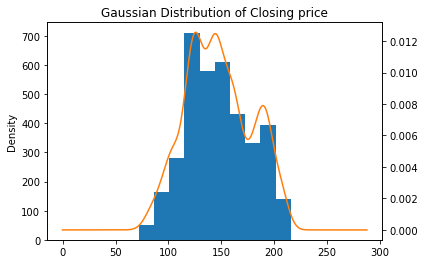

In [179]:
ax = df_processed['Close'].plot(kind='hist')
df_processed['Close'].plot(kind='kde', ax=ax, secondary_y=True)

plt.title("Gaussian Distribution of Closing price")
plt.show()


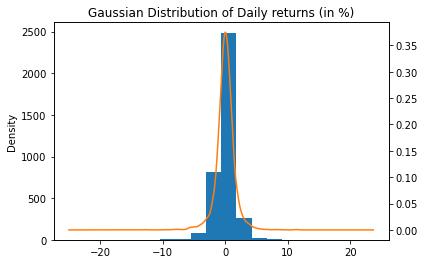

In [181]:
ax = df_processed['Daily_returns'].plot(kind='hist')
df_processed['Daily_returns'].plot(kind='kde', ax=ax, secondary_y=True)

plt.title("Gaussian Distribution of Daily returns (in %)")
plt.show()